<h2>Car Price Data Wrangling and Viz</h2>

<h3>Import</h3>
Importing necessary Python packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Dataframe</h3>
Creating dataframe (df) using free data from online.

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Setting column headers.

In [3]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
           "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df = pd.read_csv(path, names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Dealing with missing data</h3>

Replacing "?" (missing values) with NaN.

In [4]:
df.replace("?", np.NaN, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Identifying missing data. Getting avg. of missing numeric variables.

In [5]:
missing_data = df.isnull() # If data is missing then "True" else "False".
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
avg_values = {} # Initializing an empty dictionary for avg. values.
# Accessing column names.
for column in missing_data.columns.values.tolist():
    # Accessing value instances from a column.
    for value in list(missing_data[column].value_counts().items()):
        if str(value[0]) == "True":
            print("Missing values in " + column + ": " +
                  str(value[1]))
            # Filtering numericals.
            try:
                # Ignoring "price", as it is the target variable.
                if column != "price":
                    avg_values[column] = df[column].astype("float").mean(axis=0)
                    print("Its avg. value: " + str(avg_values[column]))
                    print("")
                if column == "price":
                    print("It's the target variable.\n")
            except:
                print("It's a categorical variable.\n")

Missing values in normalized-losses: 41
Its avg. value: 122.0

Missing values in num-of-doors: 2
It's a categorical variable.

Missing values in bore: 4
Its avg. value: 3.3297512437810943

Missing values in stroke: 4
Its avg. value: 3.255422885572139

Missing values in horsepower: 2
Its avg. value: 104.25615763546799

Missing values in peak-rpm: 2
Its avg. value: 5125.369458128079

Missing values in price: 4
It's the target variable.



Replacing missing numericals with avg. values.

In [7]:
for value in avg_values:
    # value = column name.
    df[value].replace(np.NaN, avg_values[value], inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Removing rows of missing target variable (price) and reseting index (since rows are removed).

In [8]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


<h3>Data type conversion</h3>

Checking data types.

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Converting data types to proper format.

In [10]:
# Columns with object data type that can be converted to float data type.
col_dtObj = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
df[col_dtObj] = df[col_dtObj].astype("float")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Standardizing data by converting them to user-friendly unit.

In [11]:
# Converting mpg to L/100km by mathematical operation (235 divided by mpg).
df["city-mpg"] = 235/df["city-mpg"]
df["highway-mpg"] = 235/df["highway-mpg"]
# Renaming to new unit.
df.rename(columns={"city-mpg": "city-L/100km", "highway-mpg": "highway-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


<h3>Data Normalization</h3>

Several approaches for data normalization:
1. Simple feature scaling: x_new = x_old/x_max
2. Min-max: x_new = (x_old - x_min)/(x_max - x_min)
3. Z-score: x_new = (x_old - x_mean)/x_std

Using z-score method.

In [12]:
df[["length", "width", "height"]] = ((df[["length", "width", "height"]] - 
                                     df[["length", "width", "height"]].mean())/
                                     df[["length", "width", "height"]].std())
df[["length", "width", "height"]].head()

,length,width,height
0,-0.438315,-0.851335,-2.029015
1,-0.438315,-0.851335,-2.029015
2,-0.243544,-0.185134,-0.558319
3,0.194690,0.147966,0.217881
4,0.194690,0.243137,0.217881


<h3>Data binning</h3>

Drawing histogram of raw data.

Text(0.5, 1.0, 'Horsepower histogram')

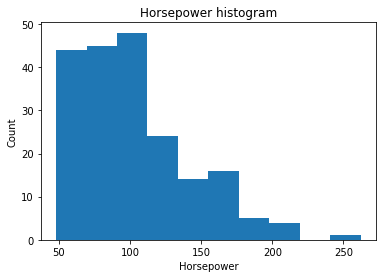

In [14]:
plt.hist(df["horsepower"])
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower histogram")

For visualization of binning raw data without binning.

Text(0.5, 1.0, 'Horsepower histogram')

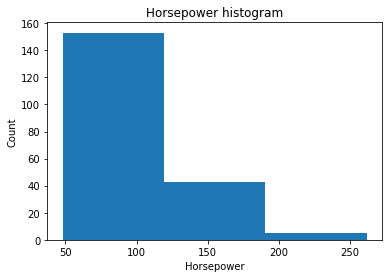

In [26]:
plt.hist(df["horsepower"], bins=3)
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower histogram")

Now, binning the data into 3 equal size groups.

In [27]:
# Dividing into 3 equal size groups i.e. setting 4 dividers.
bins_hrspwr = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
# Setting group names.
grps_hrspwr = ["Low", "Medium", "High"]
df["hrspwr-binned"] = pd.cut(df["horsepower"], bins_hrspwr, labels=grps_hrspwr, include_lowest=True)
df[["horsepower", "hrspwr-binned"]]

,horsepower,hrspwr-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
...,...,...
196,114.0,Low
197,160.0,Medium
198,134.0,Medium
199,106.0,Low


In [28]:
# Number of instances in each bin.
df["hrspwr-binned"].value_counts()

Low       153
Medium     43
High        5
Name: hrspwr-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower histogram (binned)')

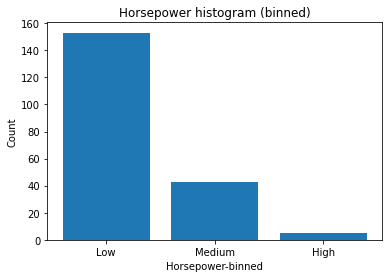

In [29]:
plt.bar(grps_hrspwr, df["hrspwr-binned"].value_counts())
plt.xlabel("Horsepower-binned")
plt.ylabel("Count")
plt.title("Horsepower histogram (binned)")